In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [27]:
def liniaAA(x0, y0, xk, yk):
    data=np.zeros((100,100,3), dtype=np.uint8)
    data.fill(255)
    
    A = (yk-y0)/(xk-x0)
    B = -1
    C = yk - A*xk
    
    for x in range(min(x0, xk), max(x0, xk)+1):
        for y in range(min(y0, yk), max(y0, yk)+1):
            dl = abs(A*x + B*y + C)/math.sqrt(A*A + B*B)
            if abs(dl) <= 1:
                colBG = (255, 255, 255)
                colLine = (125, 125, 0)
                colPix = []
                for i in range(3):
                    a = colLine[i]*(1-dl) + colBG[i]*dl
                    colPix.append(a)
                data[x,y] = tuple(colPix)
    return data


                
                
    

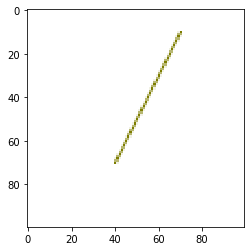

In [28]:
data = liniaAA(10, 70, 70, 40)
plt.imshow(data, interpolation='none', aspect=1)
plt.show()

In [148]:
def lineAcolor(x0, y0, xk, yk, liniaKolor, tloKolor):
    data=np.zeros((100,100,3), dtype=np.uint8)
    data[:] = tloKolor
    
    A = (yk-y0)/(xk-x0)
    B = -1
    C = yk - A*xk
    
    for x in range(min(x0, xk), max(x0, xk)+1):
        for y in range(min(y0, yk), max(y0, yk)+1):
            dl = abs(A*x + B*y + C)/math.sqrt(A*A + B*B)
            if abs(dl) <= 1:
                colPix = []
                for i in range(len(tloKolor)):
                    rgb = liniaKolor[i]*(1-dl) + tloKolor[i]*dl
                    data[x,y,i] = rgb
    return data

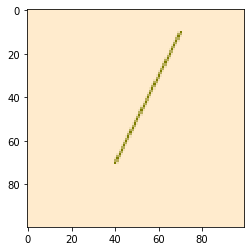

In [149]:
data = lineAcolor(10, 70, 70, 40, (125, 125, 0), (255, 235, 205))
plt.imshow(data, interpolation='none', aspect=1)
plt.show()

In [160]:
def lineAAbre(x0, y0, xk, yk, liniaKolor, tloKolor):
    data=np.zeros((100,100,3), dtype=np.uint8)
    data[:] = tloKolor
    dx = xk-x0
    dy = yk-y0
    err = 0.0
    if (abs(dx) > abs(dy)):
        if(xk<x0):
            x0, xk = xk, x0
            y0, yk = yk, y0
            dx = xk-x0
            dy = yk-y0
        A = (yk-y0)/(xk-x0)
        B = -1
        C = yk - A*xk
        y=y0
        derr=abs(dy/dx)
        a= np.sign(dy)
        for x in range(x0, xk):
            dl = abs(A*x + B*y + C)/math.sqrt(A*A + B*B)
            dl2 = abs(A*x + B*(y+1) + C)/math.sqrt(A*A + B*B)
            for i in range(len(tloKolor)):
                rgb = int(liniaKolor[i]*(1-dl) + tloKolor[i]*dl)
                rgb2 = int(liniaKolor[i]*(1-dl2) + tloKolor[i]*dl2)
                data[y,x,i] = rgb
                data[(y+1),x,i] = rgb2
            err += derr
            if (err > 0.5):
                y += a
                err += -1
    else:
        if(yk<y0):
            y0, yk = yk, y0
            x0, xk = xk, x0
            dx = xk-x0
            dy = yk-y0
        x=x0
        A = (xk-x0)/(yk-y0)
        B = -1
        C = xk - A*yk
        
        derr=abs(dy/dx)
        a = np.sign(dx)
        for y in range(y0, yk):
            dl = abs(A*y + B*x + C)/math.sqrt(A*A + B*B)
            dl2 = abs(A*(x+1) + B*y + C)/math.sqrt(A*A + B*B)
            for i in range(len(tloKolor)):
                rgb = int(liniaKolor[i]*(1-dl) + tloKolor[i]*dl)
                rgb2 = int(liniaKolor[i]*(1-dl2) + tloKolor[i]*dl2)
                data[x,y,i] = rgb
                data[(x+1),y,i] = rgb2
            err += derr
            if (err>0.5):
                x += a
                err += -1
    return data

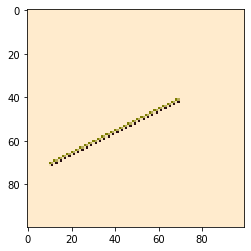

In [161]:
data = lineAAbre(10, 70, 70, 40, (125, 125, 0), (255, 235, 205))
plt.imshow(data, interpolation='none', aspect=1)
plt.show()